In [19]:
import pandas as pd
import numpy as np

In [13]:
data=pd.read_csv("dataproject2022.csv", sep=';', index_col="ID", decimal=",")
surrogate_data= data.drop(['Default (y)', 'PD','Group'] , axis = 1)


In [14]:
X = surrogate_data.drop('Pred_default (y_hat)', axis=1)
y = surrogate_data['Pred_default (y_hat)']

In [29]:
from sklearn.linear_model import LogisticRegression
surrogate_model = LogisticRegression(random_state=0).fit(X, y)

In [17]:
def logreg_to_dict(clf: LogisticRegression, feature_names: list[str]) -> dict[str, float]:
    coefs = np.concatenate([clf.intercept_, clf.coef_.squeeze()])
    return dict(zip(["intercept"] + feature_names, coefs))

In [27]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.242890
         Iterations 9
                            Logit Regression Results                            
Dep. Variable:     Pred_default (y_hat)   No. Observations:                 7440
Model:                            Logit   Df Residuals:                     7430
Method:                             MLE   Df Model:                            9
Date:                  Wed, 23 Nov 2022   Pseudo R-squ.:                  0.3242
Time:                          12:52:07   Log-Likelihood:                -1807.1
converged:                         True   LL-Null:                       -2674.0
Covariance Type:              nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Job tenure         -0.1024      0.010    -10.256      0.000      -0.122      -0.08

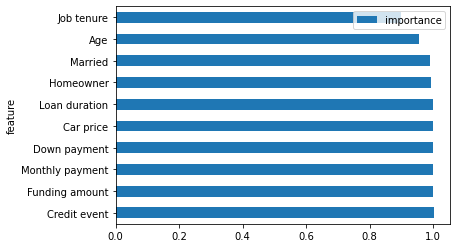

In [75]:
import math
w = surrogate_model.coef_[0]


feature_importance = pd.DataFrame(X.columns, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

 A low R2, however, will mean that the surrogate is not able to capture the behavior of the model, and drawing conclusions using the surrogate is not advisable.

### Surrogate model #2

In [52]:
from sklearn.tree import DecisionTreeClassifier
surrogate_model_2 = DecisionTreeClassifier(max_depth=4)
surrogate_model_2.fit(X, y)

DecisionTreeClassifier(max_depth=4)

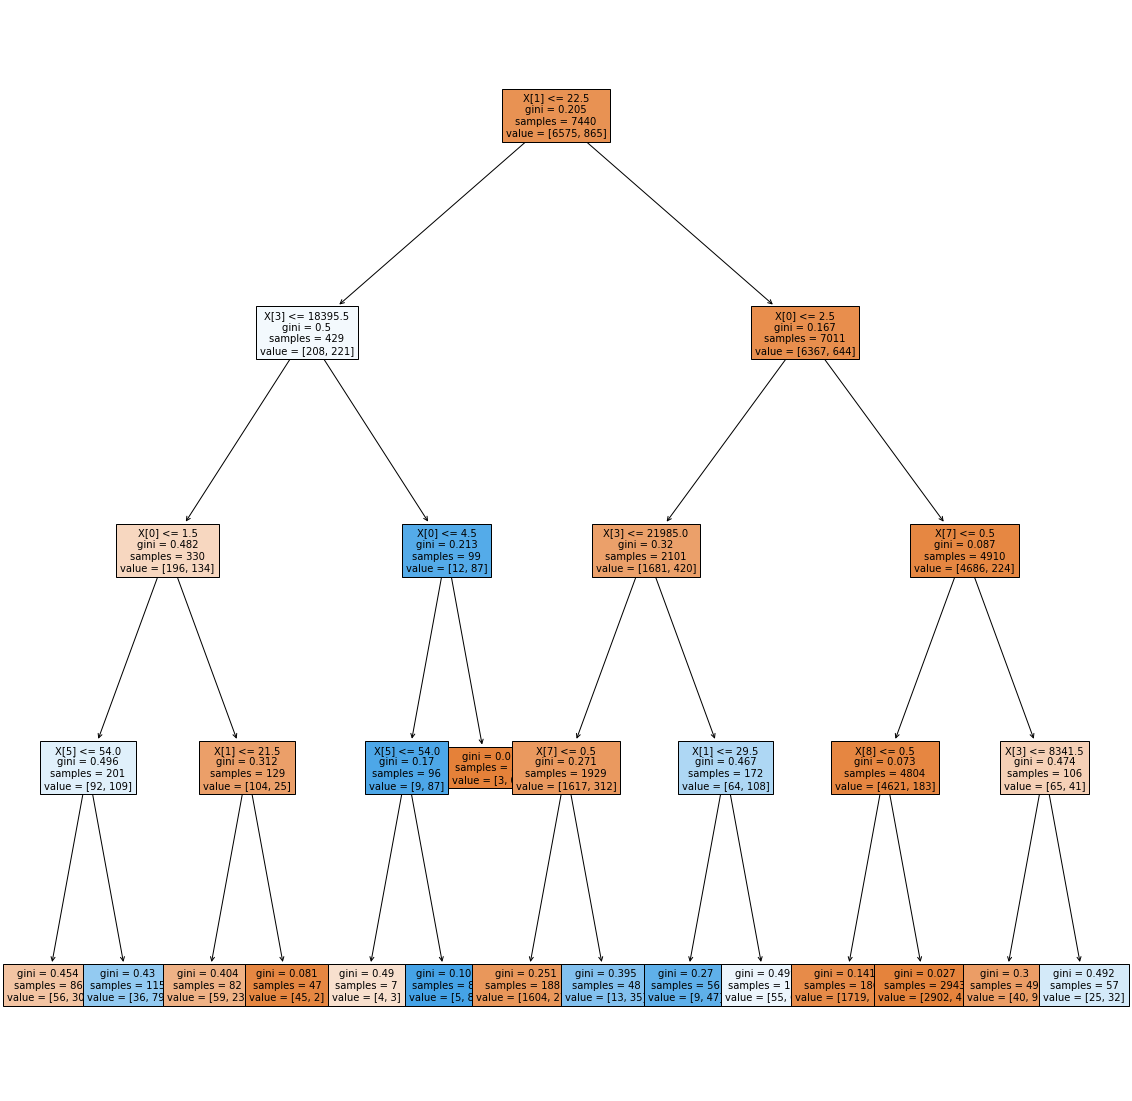

In [53]:
from sklearn import tree
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(20,20)) # Resize figure
tree.plot_tree(surrogate_model_2, filled=True, ax=ax, fontsize=10)
plt.savefig('tree_high_dpi', dpi=100)

In [81]:
import plotly.express as px
feature_importance = pd.DataFrame()
feature_importance['feature'] = X.columns
feature_importance['importance'] = surrogate_model_2.feature_importances_
feature_importance.sort_values(by="importance", ascending=False)

px.bar(feature_importance, "importance","feature").update_xaxes(categoryorder='min ascending', title="Feature importance for decision tree classifier surrogate model")

## Surrogate on our own model 